# Data visualisation with `plotnine`

In [3]:
import numpy as np
import pandas as pd

from plotnine import *

%matplotlib inline

Use the command below to install plotnine

!pip install plotnine 

In [4]:
countries = pd.read_csv('datasets/wdi-countries.csv')
wdi = pd.read_csv('datasets/wdi-data-subset.csv')

In [5]:
indicators = {
    'NY.GNP.PCAP.CD': 'gni_per_capita',  # GNI per capita, Atlas method (current US$)
    'SP.DYN.IMRT.IN': 'infant_mort',     # Mortality rate, infant (per 1,000 live births)
    'SP.DYN.LE00.IN': 'life_exp'         # Life expectancy at birth, total (years)
}

wdi['indicator_code'].replace(indicators, inplace=True)

In [6]:
wdi.head()

,country_code,indicator_code,year,value
0,ABW,gni_per_capita,1988,10360.0
1,ABW,gni_per_capita,1989,11760.0
2,ABW,gni_per_capita,1990,12230.0
3,ABW,gni_per_capita,1991,13190.0
4,ABW,gni_per_capita,1992,14000.0


In [7]:
wdi_2016 = wdi[wdi['year'] == 2016]\
           .drop(columns=['year'])\
           .pivot(index='country_code', columns='indicator_code', values='value')\
           .dropna()

In [8]:
wdi_2016 = pd.merge(wdi_2016, countries, left_index=True, right_on='country_code')

In [9]:
wdi_2016.head()

,gni_per_capita,infant_mort,life_exp,country_code,country_name,region,income_group
1,570.0,53.2,63.673,AFG,Afghanistan,South Asia,Low income
2,3770.0,55.8,61.547,AGO,Angola,Sub-Saharan Africa,Lower middle income
3,4320.0,8.1,78.345,ALB,Albania,Europe & Central Asia,Upper middle income
5,40950.0,7.7,77.256,ARE,United Arab Emirates,Middle East & North Africa,High income
6,12150.0,9.7,76.577,ARG,Argentina,Latin America & Caribbean,High income


## Histograms and density plots

**Usage**: show the distribution of a numerical variable.

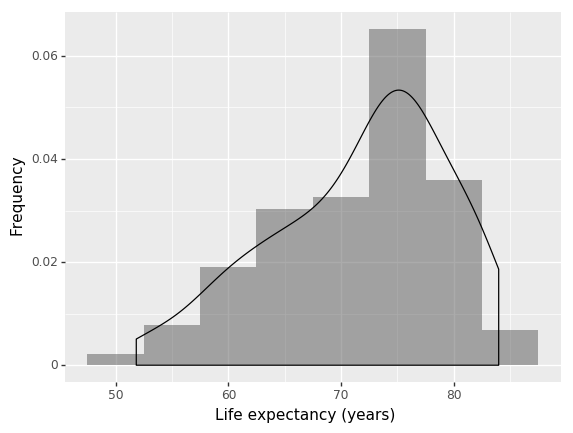

<ggplot: (-9223371897821815180)>

In [10]:
ggplot(mapping=aes(x='life_exp'), data=wdi_2016) +\
geom_histogram(mapping=aes(y='..density..'), alpha=0.5, binwidth=5) +\
geom_density() +\
xlab('Life expectancy (years)') + ylab('Frequency')

## Scatter plots

**Usage**: show the relationship between two (or pairs of) numerical variables.

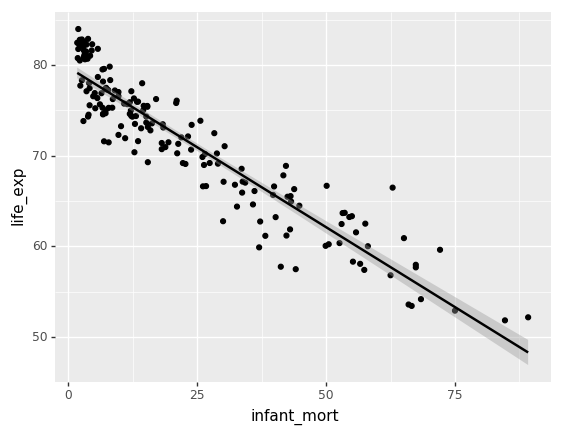

<ggplot: (139032960632)>

In [11]:
ggplot(mapping=aes(x='infant_mort', y='life_exp'), data=wdi_2016) +\
geom_point() +\
stat_smooth(method='lm')

## Bar plots

**Usage**: show a numerical comparison across categories.

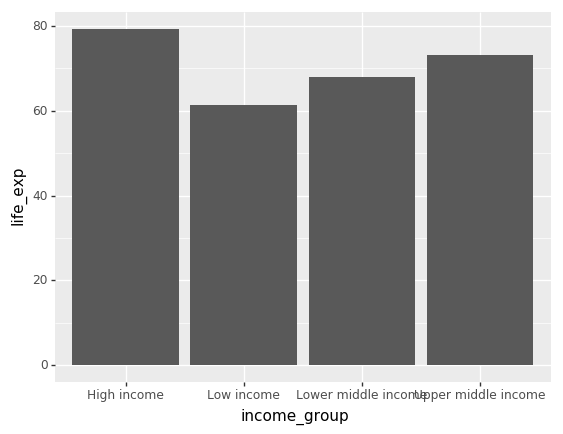

<ggplot: (139033188700)>

In [12]:
ggplot(data=wdi_2016) +\
geom_bar(mapping=aes(x='income_group', y='life_exp'), stat='summary', fun_y=np.mean)

## Box plots

**Usage**: show quartiles (and outliers) for numerical variables (also across categories).

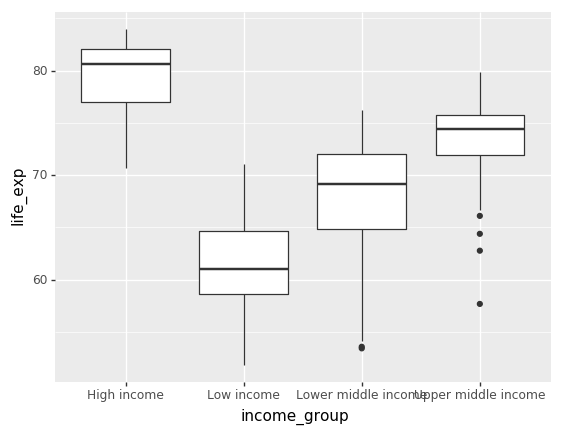

<ggplot: (139032960674)>

In [13]:
ggplot(data=wdi_2016) +\
geom_boxplot(mapping=aes(x='income_group', y='life_exp'))

## Line plots

**Usage**: show the trend of a numerical variable over time (don't use when there's no logical ordering!).

In [14]:
life_exp = wdi[wdi['country_code'].isin({'FRA', 'GBR','ITA'}) & (wdi['indicator_code'] == 'life_exp')]

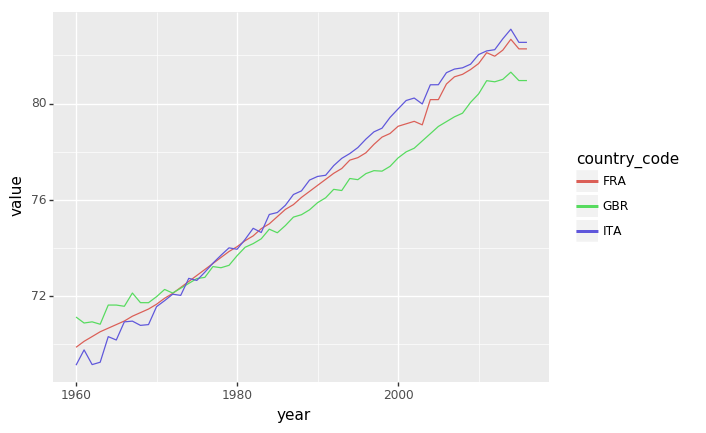

<ggplot: (139033535780)>

In [15]:
ggplot(data=life_exp) +\
geom_line(mapping=aes(x='year', y='value', color='country_code'))